# pytc API Demos

The following cells demonstrate fitting ITC experiments using the `pytc` API.  The demos are arranged (roughly) from simpler to more complex fits.  The examples use ITC data in the `pytc/demos` directory.  

In [1]:
%matplotlib inline

## Fit a single-site model to an experiment
Fits binding of calcium onto EDTA. 

# Fit successful? True
# AIC: -31.82021441338682
# AICc: -29.38543180469117
# BIC: -19.886310134001175
# F: 292708.2585502638
# Rsq: 0.9999672039142145
# Rsq_adjusted: 0.9999637876552785
# ln(L): 21.91010720669341
# num_obs: 54
# num_param: 5
# p: 1.1102230246251565e-16
type,name,dh_file,value,uncertainty,fixed,guess,lower_bound,upper_bound
local,dilution_intercept,ca-edta/tris-01.DH,-6.12666e-01,1.69297e-01,float,0.00000e+00,-inf,inf
local,dH,ca-edta/tris-01.DH,-1.15669e+04,1.19692e-02,float,-4.00000e+03,-inf,inf
local,dilution_heat,ca-edta/tris-01.DH,1.15712e+03,6.51412e-04,float,0.00000e+00,-inf,inf
local,K,ca-edta/tris-01.DH,4.05476e+07,3.44991e-06,float,1.00000e+06,-inf,inf
local,fx_competent,ca-edta/tris-01.DH,9.73948e-01,3.30663e-02,float,1.00000e+00,-inf,inf



/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


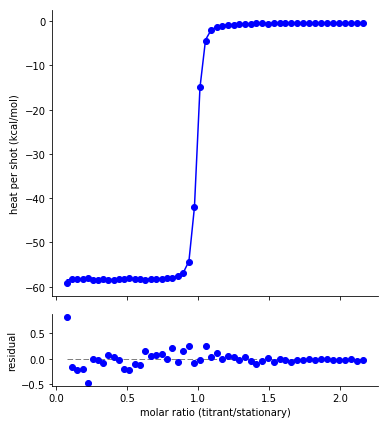

In [2]:
import pytc

# --------------------------------------------------------------------
# Create a global fitting instance
g = pytc.GlobalFit()

# --------------------------------------------------------------------
# Load in an experimental data set with a single-site binding model.  Ignore the first two shots
a = pytc.ITCExperiment("ca-edta/tris-01.DH",pytc.indiv_models.SingleSite,shot_start=2)

# Add the experiment to the fitter
g.add_experiment(a)

# --------------------------------------------------------------------
# Fit the data
g.fit()

# --------------------------------------------------------------------
# Show the results
fig, ax = g.plot()
print(g.fit_as_csv)

## Fit a binding-polynomial to an experiment
Fits binding of calcium onto EDTA. 

# Fit successful? True
# AIC: -32.11711704379702
# AICc: -29.68233443510137
# BIC: -20.183212764411376
# F: 294322.1115029892
# Rsq: 0.9999673837387419
# Rsq_adjusted: 0.9999639862115276
# ln(L): 22.05855852189851
# num_obs: 54
# num_param: 5
# p: 1.1102230246251565e-16
type,name,dh_file,value,uncertainty,fixed,guess,lower_bound,upper_bound
local,dilution_intercept,ca-edta/tris-01.DH,-6.01701e-01,1.68832e-01,float,0.00000e+00,-inf,inf
local,dilution_heat,ca-edta/tris-01.DH,1.08484e+03,6.49625e-04,float,0.00000e+00,-inf,inf
local,fx_competent,ca-edta/tris-01.DH,9.73949e-01,5.84251e-02,float,1.00000e+00,-inf,inf
local,beta1,ca-edta/tris-01.DH,4.04190e+07,3.67343e-06,float,1.00000e+07,-inf,inf
local,dH1,ca-edta/tris-01.DH,-1.15687e+04,1.19373e-02,float,-4.00000e+03,-inf,inf



/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


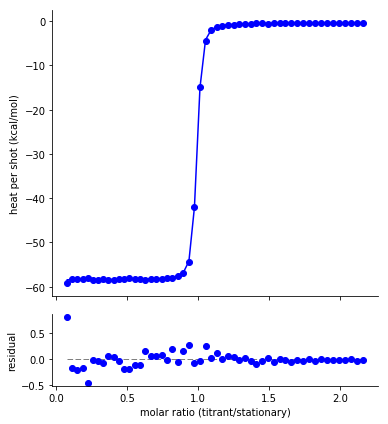

In [3]:
import pytc

# --------------------------------------------------------------------
# Create a global fitting instance
g = pytc.GlobalFit()

# --------------------------------------------------------------------
# Load in an experimental data set with a single-site binding polynomial model
a = pytc.ITCExperiment("ca-edta/tris-01.DH",pytc.indiv_models.BindingPolynomial,num_sites=1,shot_start=2)
# Add the experiment to the fitter
g.add_experiment(a)
g.update_guess("beta1",1e7,a)

# --------------------------------------------------------------------
# Fit the data
g.fit()

# --------------------------------------------------------------------
# Show the results
fig, ax = g.plot()
print(g.fit_as_csv)


## Fit a competitor binding model to an experiment
Fits binding of calcium to EDTA. There is no competitor in the actual experiment, but we can assert competitor is in the cell and syringe (via `C_cell` and `C_syringe`) to test the function.

/usr/local/lib/python3.5/dist-packages/pytc_fitter-0.1.0-py3.5.egg/pytc/indiv_models/single_site_competitor.py:74: RuntimeWarning: invalid value encountered in sqrt
  theta = np.arccos((-2*alpha**3 + 9*alpha*beta - 27*gamma)/(2*np.sqrt((alpha**2 - 3*beta)**3)))
/usr/local/lib/python3.5/dist-packages/pytc_fitter-0.1.0-py3.5.egg/pytc/indiv_models/single_site_competitor.py:74: RuntimeWarning: invalid value encountered in arccos
  theta = np.arccos((-2*alpha**3 + 9*alpha*beta - 27*gamma)/(2*np.sqrt((alpha**2 - 3*beta)**3)))
/usr/local/lib/python3.5/dist-packages/pytc_fitter-0.1.0-py3.5.egg/pytc/indiv_models/single_site_competitor.py:76: RuntimeWarning: invalid value encountered in sqrt
  mol_fx_s = (2*np.sqrt(alpha**2 - 3*beta) * np.cos(theta/3) - alpha)/3


# Fit successful? True
# AIC: -32.630203997600326
# AICc: -28.539294906691236
# BIC: -16.71833162508613
# F: 219032.74366543346
# Rsq: 0.9999699988626901
# Rsq_adjusted: 0.9999654334722299
# ln(L): 24.315101998800163
# num_obs: 54
# num_param: 7
# p: 1.1102230246251565e-16
type,name,dh_file,value,uncertainty,fixed,guess,lower_bound,upper_bound
local,dilution_intercept,ca-edta/tris-01.DH,-3.58480e-01,1.65332e-01,float,0.00000e+00,-inf,inf
local,dHcompetitor,ca-edta/tris-01.DH,-1.12429e+04,1.15697e-03,float,-4.00000e+03,-inf,inf
local,dilution_heat,ca-edta/tris-01.DH,-2.49708e+02,7.71532e-04,float,0.00000e+00,-inf,inf
local,K,ca-edta/tris-01.DH,8.17253e+07,1.65953e-06,float,1.00000e+06,-inf,inf
local,Kcompetitor,ca-edta/tris-01.DH,8.86868e+06,5.47273e-06,float,1.00000e+06,-inf,inf
local,dH,ca-edta/tris-01.DH,-1.14920e+04,1.16897e-02,float,-4.00000e+03,-inf,inf
local,fx_competent,ca-edta/tris-01.DH,1.08259e+00,4.31456e-02,float,1.00000e+00,-inf,inf



/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


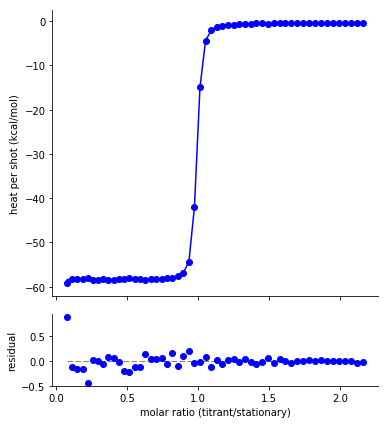

In [4]:
import pytc

# --------------------------------------------------------------------
# Create a global fitting instance
g = pytc.GlobalFit()

# --------------------------------------------------------------------
# Load in an experimental data set with a single site competitor model,
# with fake 10 uM competitor in the cell and syringe.
a = pytc.ITCExperiment("ca-edta/tris-01.DH",pytc.indiv_models.SingleSiteCompetitor,C_cell=1e-5,C_syringe=1e-5,shot_start=2)
# Add the experiment to the fitter
g.add_experiment(a)

# --------------------------------------------------------------------
# Fit the data
g.fit()

# --------------------------------------------------------------------
# Show the results
fig, ax = g.plot()
print(g.fit_as_csv)


## Change parameter bounds and guesses.  Fix a parameter value.
Fits binding of calcium onto EDTA. 

# Fit successful? True
# AIC: 270.2406337771019
# AICc: 272.02786781965506
# BIC: 280.1855540099233
# F: 1327.1417522908107
# Rsq: 0.9908540574713021
# Rsq_adjusted: 0.990107449917939
# ln(L): -130.12031688855095
# num_obs: 54
# num_param: 4
# p: 1.1102230246251565e-16
type,name,dh_file,value,uncertainty,fixed,guess,lower_bound,upper_bound
local,dilution_intercept,ca-edta/tris-01.DH,2.20846e+00,2.79876e+00,float,0.00000e+00,-inf,inf
local,dH,ca-edta/tris-01.DH,-1.19075e+04,1.97830e-01,float,-4.00000e+03,-inf,inf
local,dilution_heat,ca-edta/tris-01.DH,-1.25968e+04,1.07690e-02,float,0.00000e+00,-inf,inf
local,K,ca-edta/tris-01.DH,1.69720e+07,1.36163e-04,float,1.00000e+03,1.00000e+00,1.00000e+12
local,fx_competent,ca-edta/tris-01.DH,1.00000e+00,0.00000e+00,fixed,1.00000e+00,-inf,inf



/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


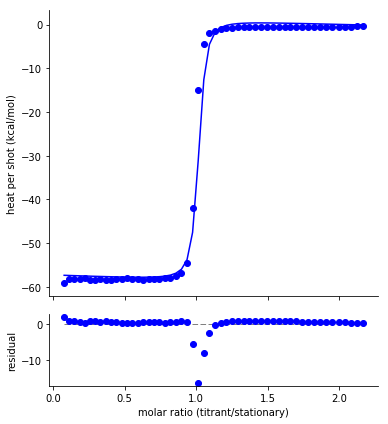

In [5]:
import pytc

"""
This will be a bad fit because we constrained the values to the wrong values.
"""

# --------------------------------------------------------------------
# Create a global fitting instance
g = pytc.GlobalFit()

# --------------------------------------------------------------------
# Load in an experimental data set with a single-site binding model
a = pytc.ITCExperiment("ca-edta/tris-01.DH",pytc.indiv_models.SingleSite,shot_start=2)

# Add the experiment to the fitter
g.add_experiment(a)

# Update bounds and guess for "K".  Then fix fx_competent.  
g.update_bounds("K",(1,1e12),a)
g.update_guess("K",1000,a)
g.update_fixed("fx_competent",1.0,a)

# --------------------------------------------------------------------
# Fit the data
g.fit()

# --------------------------------------------------------------------
# Show the results
fig, ax = g.plot()
print(g.fit_as_csv)

## Fit a single-site model to an experiment and blank titration simultaneously
Fits binding of calcium onto EDTA. 

# Fit successful? True
# AIC: -106.6647117589271
# AICc: -105.44732045457927
# BIC: -91.03369064299855
# F: 639862.8061600361
# Rsq: 0.9999706195649035
# Rsq_adjusted: 0.9999690567758026
# ln(L): 59.33235587946355
# num_obs: 100
# num_param: 5
# p: 1.1102230246251565e-16
type,name,dh_file,value,uncertainty,fixed,guess,lower_bound,upper_bound
global,global_heat,NA,-4.81345e+02,3.82632e-04,float,0.00000e+00,-inf,inf
global,global_intercept,NA,-3.01160e-01,1.37159e-01,float,0.00000e+00,-inf,inf
local,dH,ca-edta/tris-01.DH,-1.16161e+04,9.69669e-03,float,-4.00000e+03,-inf,inf
local,K,ca-edta/tris-01.DH,3.93751e+07,3.15016e-06,float,1.00000e+06,-inf,inf
local,fx_competent,ca-edta/tris-01.DH,9.74053e-01,2.72378e-02,float,1.00000e+00,-inf,inf



/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


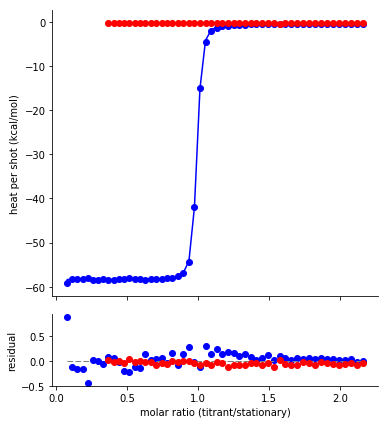

In [6]:
import pytc
%matplotlib inline

# --------------------------------------------------------------------
# Create a global fitting instance
g = pytc.GlobalFit()

# --------------------------------------------------------------------
# Load in an experimental data set with a single-site binding model
a = pytc.ITCExperiment("ca-edta/tris-01.DH",pytc.indiv_models.SingleSite,shot_start=2)

# Add the experiment to the fitter.  Then link the dilution heat and
# intercept to global parameters
g.add_experiment(a)
g.link_to_global(a,"dilution_heat","global_heat")
g.link_to_global(a,"dilution_intercept","global_intercept")

# --------------------------------------------------------------------
# Load in a blank titration
b = pytc.ITCExperiment("ca-edta/tris-blank.DH",pytc.indiv_models.Blank,shot_start=10)

# Add a blank titration to the fitter. Then link the dilution heat and
# intercept to global parameters
g.add_experiment(b)
g.link_to_global(b,"dilution_heat","global_heat")
g.link_to_global(b,"dilution_intercept","global_intercept")

# --------------------------------------------------------------------
# Do a global fit to the single-site and blank titrations
g.fit()

# --------------------------------------------------------------------
# Show the results
fig, ax = g.plot()
print(g.fit_as_csv)


## Fit the baseline, specifying to only use the last part of the titration to fit the baseline

# Fit successful? True
# AIC: -182.71328038012885
# AICc: -180.90682876722562
# BIC: -169.2223089278327
# F: 431197.1401614386
# Rsq: 0.9999703238362502
# Rsq_adjusted: 0.9999680053859572
# ln(L): 97.35664019006443
# num_obs: 70
# num_param: 5
# p: 1.1102230246251565e-16
type,name,dh_file,value,uncertainty,fixed,guess,lower_bound,upper_bound
global,global_heat,NA,-4.51172e+02,8.74940e+00,float,0.00000e+00,-inf,inf
global,global_intercept,NA,-5.23344e-02,7.58524e+02,float,0.00000e+00,-inf,inf
local,dH,ca-edta/hepes-01.DH,-4.59280e+03,0.00000e+00,float,-4.00000e+03,-inf,inf
local,K,ca-edta/hepes-01.DH,3.79453e+07,0.00000e+00,float,1.00000e+06,-inf,inf
local,fx_competent,ca-edta/hepes-01.DH,1.13892e+00,0.00000e+00,float,1.00000e+00,-inf,inf



/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


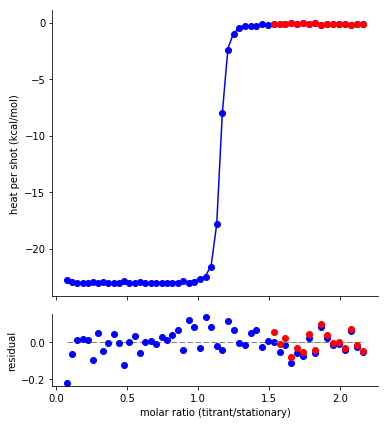

In [7]:
import pytc
%matplotlib inline

# --------------------------------------------------------------------
# Create a global fitting instance
g = pytc.GlobalFit()

# --------------------------------------------------------------------
# Load in an experimental data set with a single-site binding model
a = pytc.ITCExperiment("ca-edta/hepes-01.DH",pytc.indiv_models.SingleSite,shot_start=2)

# Add the experiment to the fitter.  Then link the dilution heat and
# intercept to global parameters
g.add_experiment(a)
g.link_to_global(a,"dilution_heat","global_heat")
g.link_to_global(a,"dilution_intercept","global_intercept")

# --------------------------------------------------------------------
# Load in a blank titration
b = pytc.ITCExperiment("ca-edta/hepes-01.DH",pytc.indiv_models.Blank,shot_start=40)

# Add a blank titration to the fitter. Adding it with a large weight 
# makes sure the fitter uses this baseline. Then link the dilution heat and
# intercept to global parameters
g.add_experiment(b, weight=1000) 
g.link_to_global(b,"dilution_heat","global_heat")
g.link_to_global(b,"dilution_intercept","global_intercept")

# --------------------------------------------------------------------
# Do a global fit to the single-site and blank titrations
g.fit()

# --------------------------------------------------------------------
# Show the results
fig, ax = g.plot()
print(g.fit_as_csv)


## Fit a single-site model to three experimental replicate titrations, with a blank titration
Fits binding of calcium onto EDTA. 

# Fit successful? True
# AIC: -105.12895112288211
# AICc: -104.25516471511513
# BIC: -78.12672386140879
# F: 108469.88239902245
# Rsq: 0.9997261345975281
# Rsq_adjusted: 0.9997169179734064
# ln(L): 60.56447556144106
# num_obs: 216
# num_param: 7
# p: 1.1102230246251565e-16
type,name,dh_file,value,uncertainty,fixed,guess,lower_bound,upper_bound
global,global_heat,NA,9.77657e+02,5.18431e-04,float,0.00000e+00,-inf,inf
global,global_K,NA,4.20409e+07,2.36245e-06,float,1.00000e+06,-inf,inf
global,global_intercept,NA,-3.88971e-01,1.85842e-01,float,0.00000e+00,-inf,inf
global,global_dH,NA,-4.57753e+03,1.31392e-02,float,-4.00000e+03,-inf,inf
local,fx_competent,ca-edta/hepes-01.DH,1.13804e+00,1.79237e-02,float,1.00000e+00,-inf,inf
local,fx_competent,ca-edta/hepes-02.DH,1.14382e+00,0.00000e+00,float,1.00000e+00,-inf,inf
local,fx_competent,ca-edta/hepes-03.DH,1.14855e+00,0.00000e+00,float,1.00000e+00,-inf,inf



/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


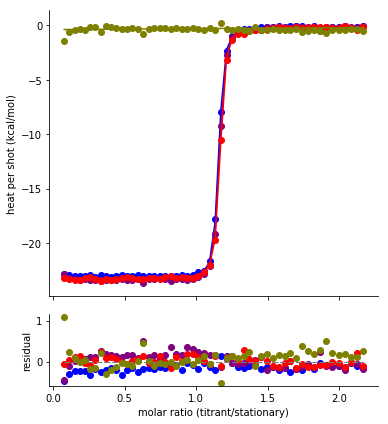

In [8]:
import pytc

# --------------------------------------------------------------------
# Create a global fitting instance
g = pytc.GlobalFit()

# --------------------------------------------------------------------
# Load in an experimental data set with a single-site binding model
a = pytc.ITCExperiment("ca-edta/hepes-01.DH",pytc.indiv_models.SingleSite,shot_start=2)

# Add the experiment to the fitter.  Then link the dilution heat, 
# intercept, K, and dH to global parameters
g.add_experiment(a)
g.link_to_global(a,"dilution_heat","global_heat")
g.link_to_global(a,"dilution_intercept","global_intercept")
g.link_to_global(a,"K","global_K")
g.link_to_global(a,"dH","global_dH")

# --------------------------------------------------------------------
# Load in an experimental data set with a single-site binding model
b = pytc.ITCExperiment("ca-edta/hepes-02.DH",pytc.indiv_models.SingleSite,shot_start=2)

# Add the experiment to the fitter.  Then link the dilution heat, 
# intercept, K, and dH to global parameters
g.add_experiment(b)
g.link_to_global(b,"dilution_heat","global_heat")
g.link_to_global(b,"dilution_intercept","global_intercept")
g.link_to_global(b,"K","global_K")
g.link_to_global(b,"dH","global_dH")

# --------------------------------------------------------------------
# Load in an experimental data set with a single-site binding model
c = pytc.ITCExperiment("ca-edta/hepes-03.DH",pytc.indiv_models.SingleSite,shot_start=2)

# Add the experiment to the fitter.  Then link the dilution heat, 
# intercept, K, and dH to global parameters
g.add_experiment(c)
g.link_to_global(c,"dilution_heat","global_heat")
g.link_to_global(c,"dilution_intercept","global_intercept")
g.link_to_global(c,"K","global_K")
g.link_to_global(c,"dH","global_dH")

# --------------------------------------------------------------------
# Load in a blank titration
d = pytc.ITCExperiment("ca-edta/hepes-blank.DH",pytc.indiv_models.Blank,shot_start=2)

# Add a blank titration to the fitter. Then link the dilution heat and
# intercept to global parameters
g.add_experiment(d)
g.link_to_global(d,"dilution_heat","global_heat")
g.link_to_global(d,"dilution_intercept","global_intercept")

# --------------------------------------------------------------------
# Do a global fit to the four titrations
g.fit()

# --------------------------------------------------------------------

# Show the results
fig, ax = g.plot()
print(g.fit_as_csv)

## Fit three experiments in different buffers (with paired blanks) to determine buffer-independent enthalpy and number of protons exchanged on binding
Fits binding of calcium onto EDTA in HEPES, Tris, and Imidazole.

# Fit successful? True
# AIC: 105.86078913625926
# AICc: 107.22001243723012
# BIC: 155.01045484155952
# F: 121809.06645298043
# Rsq: 0.9997872805822785
# Rsq_adjusted: 0.9997790727590867
# ln(L): -39.93039456812963
# num_obs: 324
# num_param: 12
# p: 1.1102230246251565e-16
type,name,dh_file,value,uncertainty,fixed,guess,lower_bound,upper_bound
global,imid_intercept,NA,-8.19165e-01,0.00000e+00,float,0.00000e+00,-inf,inf
global,hepes_heat,NA,-4.04133e+02,9.37602e-04,float,0.00000e+00,-inf,inf
global,tris_heat,NA,-2.37406e+03,0.00000e+00,float,0.00000e+00,-inf,inf
global,tris_intercept,NA,-2.30816e-02,0.00000e+00,float,0.00000e+00,-inf,inf
global,global_K,NA,4.33275e+07,3.74611e-06,float,1.00000e+06,-inf,inf
global,hepes_intercept,NA,-2.01588e-01,2.78921e-01,float,0.00000e+00,-inf,inf
global,np_num_H,NA,-1.10023e+00,1.37691e+00,float,0.00000e+00,-inf,inf
global,np_dH_intrinsic,NA,7.70482e+02,1.97187e-02,float,0.00000e+00,-inf,inf
global,imid_heat,NA,3.48388e+03,0.00000e+00,float,0.00000e+

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


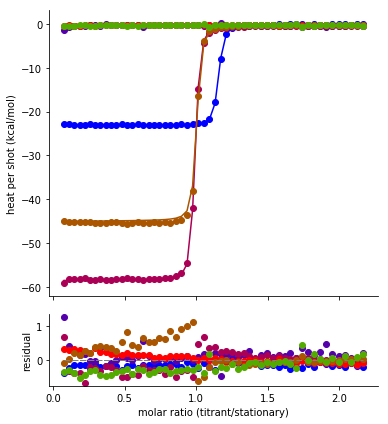

In [9]:
# --------------------------------------------------------------------
# define buffer ionization enthalpies.
# goldberg et al (2002) Journal of Physical and Chemical Reference Data 31 231,  doi: 10.1063/1.1416902
HEPES_IONIZATION_DH = 20.4/4.184*1000
TRIS_IONIZATION_DH = 47.45/4.184*1000
IMID_IONIZATION_DH = 36.64/4.184*1000 

import pytc
from pytc import global_connectors

# --------------------------------------------------------------------
# Create a global fitting instance
g = pytc.GlobalFit()
num_protons = global_connectors.NumProtons("np")

# ------------------------------------------------------------------------------------
# HEPES buffer experiment

hepes = pytc.ITCExperiment("ca-edta/hepes-01.DH",pytc.indiv_models.SingleSite,shot_start=2)
hepes.ionization_enthalpy = HEPES_IONIZATION_DH

g.add_experiment(hepes)
g.link_to_global(hepes,"K","global_K")
g.link_to_global(hepes,"dH",num_protons.dH)
g.link_to_global(hepes,"dilution_heat","hepes_heat")
g.link_to_global(hepes,"dilution_intercept","hepes_intercept")

# ------------------------------------------------------------------------------------
# HEPES buffer blank

hepes_blank = pytc.ITCExperiment("ca-edta/hepes-blank.DH",pytc.indiv_models.Blank,shot_start=2)
hepes.ionization_enthalpy = HEPES_IONIZATION_DH

g.add_experiment(hepes_blank)
g.link_to_global(hepes_blank,"dilution_heat","hepes_heat")
g.link_to_global(hepes_blank,"dilution_intercept","hepes_intercept")

# ------------------------------------------------------------------------------------
# Tris buffer experiment

tris = pytc.ITCExperiment("ca-edta/tris-01.DH",pytc.indiv_models.SingleSite,shot_start=2)
tris.ionization_enthalpy = TRIS_IONIZATION_DH

g.add_experiment(tris)
g.link_to_global(tris,"K","global_K")
g.link_to_global(tris,"dH",num_protons.dH)
g.link_to_global(tris,"dilution_heat","tris_heat")
g.link_to_global(tris,"dilution_intercept","tris_intercept")

# ------------------------------------------------------------------------------------
# Tris buffer blank

tris_blank = pytc.ITCExperiment("ca-edta/tris-blank.DH",pytc.indiv_models.Blank,shot_start=2)
tris.ionization_enthalpy = TRIS_IONIZATION_DH

g.add_experiment(tris_blank)
g.link_to_global(tris_blank,"dilution_heat","tris_heat")
g.link_to_global(tris_blank,"dilution_intercept","tris_intercept")

# ------------------------------------------------------------------------------------
# Imidazole buffer experiment

imid = pytc.ITCExperiment("ca-edta/imid-01.DH",pytc.indiv_models.SingleSite,shot_start=2)
imid.ionization_enthalpy = IMID_IONIZATION_DH

g.add_experiment(imid)
g.link_to_global(imid,"K","global_K")
g.link_to_global(imid,"dH",num_protons.dH)
g.link_to_global(imid,"dilution_heat","imid_heat")
g.link_to_global(imid,"dilution_intercept","imid_intercept")

# ------------------------------------------------------------------------------------
# Imidazole buffer blank

imid_blank = pytc.ITCExperiment("ca-edta/imid-blank.DH",pytc.indiv_models.Blank,shot_start=2)
imid.ionization_enthalpy = IMID_IONIZATION_DH

g.add_experiment(imid_blank)
g.link_to_global(imid_blank,"dilution_heat","imid_heat")
g.link_to_global(imid_blank,"dilution_intercept","imid_intercept")

# --------------------------------------------------------------------
# Do a global fit
g.fit()

# Show the results
fig, ax = g.plot()
print(g.fit_as_csv)


## Implement a global connector for number of protons vs. ionization enthalpy

/usr/local/lib/python3.5/dist-packages/pytc_fitter-0.1.0-py3.5.egg/pytc/indiv_models/single_site.py:32: RuntimeWarning: invalid value encountered in sqrt
  ST = (b - np.sqrt((b)**2 - 4*S_conc_corr*self._T_conc))/2


# Fit successful? True
# AIC: -87.3909029396226
# AICc: -84.10669241330682
# BIC: -57.88745944125618
# F: 295081.12407553074
# Rsq: 0.9999671287644053
# Rsq_adjusted: 0.9999637399772305
# ln(L): 54.6954514698113
# num_obs: 108
# num_param: 10
# p: 1.1102230246251565e-16
type,name,dh_file,value,uncertainty,fixed,guess,lower_bound,upper_bound
global,np_num_H,NA,-9.79065e-01,1.15256e+00,float,1.00000e-01,-inf,inf
global,np_dH_intrinsic,NA,-4.63537e+02,1.08227e-02,float,0.00000e+00,-inf,inf
local,dilution_intercept,ca-edta/tris-01.DH,-6.12665e-01,1.53080e-01,float,0.00000e+00,-inf,inf
local,dilution_heat,ca-edta/tris-01.DH,1.15711e+03,6.54820e-04,float,0.00000e+00,-inf,inf
local,K,ca-edta/tris-01.DH,4.05476e+07,3.40775e-06,float,1.00000e+06,-inf,inf
local,fx_competent,ca-edta/tris-01.DH,9.73948e-01,3.27152e-02,float,1.00000e+00,-inf,inf
local,dilution_intercept,ca-edta/imid-01.DH,-1.86990e-01,0.00000e+00,float,0.00000e+00,-inf,inf
local,dilution_heat,ca-edta/imid-01.DH,-9.45103e+02,0.00000

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


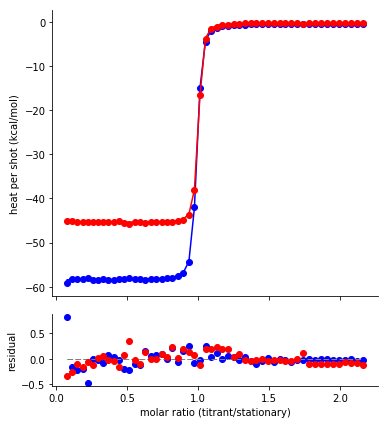

In [15]:
# --------------------------------------------------------------------
# define buffer ionization enthalpies.
# goldberg et al (2002) Journal of Physical and Chemical Reference Data 31 231,  doi: 10.1063/1.1416902
TRIS_IONIZATION_DH = 47.45/4.184*1000
IMID_IONIZATION_DH = 36.64/4.184*1000 

import pytc
from pytc import global_connectors

class MyNumProtons(pytc.GlobalConnector):
    
    param_guesses = {"num_H":0.1,"dH_intrinsic":0.0}
    
    def dH(self,experiment):

        return self.dH_intrinsic + self.num_H*experiment.ionization_enthalpy


# --------------------------------------------------------------------
# Create a global fitting instance
g = pytc.GlobalFit()
num_protons = MyNumProtons("np")

# ------------------------------------------------------------------------------------
# Tris buffer experiment

tris = pytc.ITCExperiment("ca-edta/tris-01.DH",pytc.indiv_models.SingleSite,shot_start=2)
tris.ionization_enthalpy = TRIS_IONIZATION_DH

g.add_experiment(tris)
g.link_to_global(tris,"dH",num_protons.dH)

# ------------------------------------------------------------------------------------
# Imidazole buffer experiment

imid = pytc.ITCExperiment("ca-edta/imid-01.DH",pytc.indiv_models.SingleSite,shot_start=2)
imid.ionization_enthalpy = IMID_IONIZATION_DH

g.add_experiment(imid)
g.link_to_global(imid,"dH",num_protons.dH)

# --------------------------------------------------------------------
# Do a global fit
g.fit()

# Show the results
fig, ax = g.plot()
print(g.fit_as_csv)

## Fit single-site binding curves to experiments at four temperatures to extract the van't Hoff enthalpy.
Titrations of recombinant human S100A14 with $ZnCl_{2}$ at $5$, $10$, $17$, $25$, $30$ and $35 ^{\circ}C$.  Concentrations were: $[protein] = 110\ \mu M$ and $[ZnCl_{2}]=200\ mM$.  Buffer was $25\ mM$ Trizma, $100\ mM$ NaCl, $pH\ 7.4$.  Buffer was treated with chelex and filtered to $0.22\ \mu m$.  Data collected using a GE ITC200. 

# Fit successful? True
# AIC: 143.78356229546225
# AICc: 153.98356229546224
# BIC: 181.49090352249573
# F: 1666.0899879269812
# Rsq: 0.9975242429326262
# Rsq_adjusted: 0.9969252694485842
# ln(L): -55.89178114773112
# num_obs: 78
# num_param: 15
# p: 1.1102230246251565e-16
type,name,dh_file,value,uncertainty,fixed,guess,lower_bound,upper_bound
global,vh_dH_vanthoff,NA,-6.23430e+03,3.15659e-02,float,0.00000e+00,-inf,inf
global,vh_K_ref,NA,9.05921e+03,1.33908e-02,float,1.00000e+02,-inf,inf
global,g_competent,NA,1.47189e+00,1.68720e+00,float,1.00000e+00,5.00000e-01,1.50000e+00
local,dilution_intercept,temp-dependence/5C.DH,-7.42388e+00,0.00000e+00,float,0.00000e+00,-inf,inf
local,dilution_heat,temp-dependence/5C.DH,1.18812e+04,0.00000e+00,float,0.00000e+00,-inf,inf
local,dilution_intercept,temp-dependence/10C.DH,5.63488e+00,0.00000e+00,float,0.00000e+00,-inf,inf
local,dilution_heat,temp-dependence/10C.DH,-4.08142e+03,0.00000e+00,float,0.00000e+00,-inf,inf
local,dilution_intercept,temp-depe

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


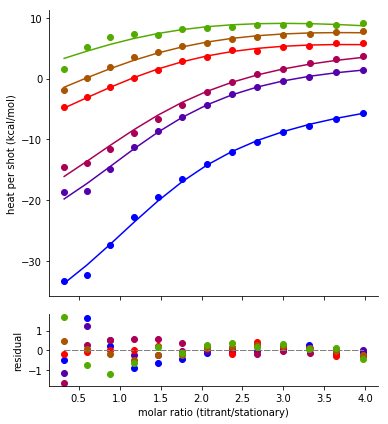

In [12]:
import pytc
from pytc import global_connectors

# --------------------------------------------------------------------
# Create a global fitting instance
g1 = pytc.GlobalFit()
vh = pytc.global_connectors.VantHoff("vh")

#--------------------------------------------------------------------------------------------------

t5 = pytc.ITCExperiment("temp-dependence/5C.DH",pytc.indiv_models.SingleSite,shot_start=1)
g1.add_experiment(t5)
g1.link_to_global(t5,"dH",vh.dH)
g1.link_to_global(t5,"K",vh.K)
g1.link_to_global(t5,"fx_competent","g_competent")


#--------------------------------------------------------------------------------------------------

t10 = pytc.ITCExperiment("temp-dependence/10C.DH",pytc.indiv_models.SingleSite,shot_start=1)
g1.add_experiment(t10)
g1.link_to_global(t10,"dH",vh.dH)
g1.link_to_global(t10,"K",vh.K)
g1.link_to_global(t10,"fx_competent","g_competent")

#--------------------------------------------------------------------------------------------------

t17 = pytc.ITCExperiment("temp-dependence/17C.DH",pytc.indiv_models.SingleSite,shot_start=1)
g1.add_experiment(t17)
g1.link_to_global(t17,"dH",vh.dH)
g1.link_to_global(t17,"K",vh.K)
g1.link_to_global(t17,"fx_competent","g_competent")

#--------------------------------------------------------------------------------------------------

t25 = pytc.ITCExperiment("temp-dependence/25C.DH",pytc.indiv_models.SingleSite,shot_start=1)
g1.add_experiment(t25)
g1.link_to_global(t25,"dH",vh.dH)
g1.link_to_global(t25,"K",vh.K)
g1.link_to_global(t25,"fx_competent","g_competent")

#--------------------------------------------------------------------------------------------------

t30 = pytc.ITCExperiment("temp-dependence/30C.DH",pytc.indiv_models.SingleSite,shot_start=1)
g1.add_experiment(t30)
g1.link_to_global(t30,"dH",vh.dH)
g1.link_to_global(t30,"K",vh.K)
g1.link_to_global(t30,"fx_competent","g_competent")

#--------------------------------------------------------------------------------------------------

t35 = pytc.ITCExperiment("temp-dependence/35C.DH",pytc.indiv_models.SingleSite,shot_start=1)
g1.add_experiment(t35)
g1.link_to_global(t35,"dH",vh.dH)
g1.link_to_global(t35,"K",vh.K)
g1.link_to_global(t35,"fx_competent","g_competent")

g1.update_bounds("g_competent",(0.5,1.5))
g1.update_guess("vh_K_ref",100)

# Do fit
g1.fit()

# Show the results
fit, ax = g1.plot()
print(g1.fit_as_csv)


# Fit successful? True
# AIC: 143.41705438531207
# AICc: 155.01027472429513
# BIC: 183.48110443903514
# F: 1583.9825760555236
# Rsq: 0.9975982289804043
# Rsq_adjusted: 0.9969682562539529
# ln(L): -54.708527192656035
# num_obs: 78
# num_param: 16
# p: 1.1102230246251565e-16
type,name,dh_file,value,uncertainty,fixed,guess,lower_bound,upper_bound
global,vh_dH_ref,NA,-3.43521e+03,2.72933e-02,float,0.00000e+00,-inf,inf
global,g_competent,NA,1.30812e+00,1.80629e+00,float,1.00000e+00,5.00000e-01,1.50000e+00
global,vh_K_ref,NA,1.76825e+04,2.09863e-03,float,1.00000e+02,-inf,inf
global,vh_dCp,NA,5.60136e+01,8.54236e-02,float,0.00000e+00,-inf,inf
local,dilution_intercept,temp-dependence/5C.DH,-1.40525e+01,5.61041e-01,float,0.00000e+00,-inf,inf
local,dilution_heat,temp-dependence/5C.DH,2.68391e+04,8.52305e-03,float,0.00000e+00,-inf,inf
local,dilution_intercept,temp-dependence/10C.DH,-1.27131e+00,0.00000e+00,float,0.00000e+00,-inf,inf
local,dilution_heat,temp-dependence/10C.DH,1.12184e+04,0.00000e+

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


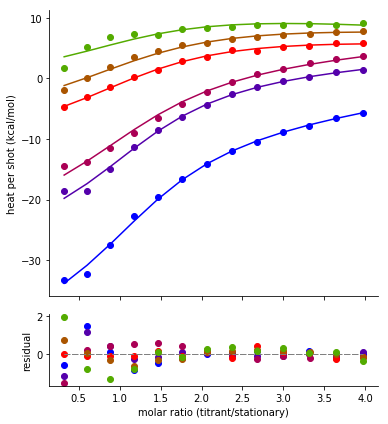

In [13]:

import pytc
from pytc import global_connectors

# --------------------------------------------------------------------
# Create a global fitting instance
g2 = pytc.GlobalFit()
vhe = global_connectors.VantHoffExtended("vh")

#--------------------------------------------------------------------------------------------------

t5 = pytc.ITCExperiment("temp-dependence/5C.DH",pytc.indiv_models.SingleSite,shot_start=1)
g2.add_experiment(t5)
g2.link_to_global(t5,"dH",vhe.dH)
g2.link_to_global(t5,"K",vhe.K)
g2.link_to_global(t5,"fx_competent","g_competent")


#--------------------------------------------------------------------------------------------------

t10 = pytc.ITCExperiment("temp-dependence/10C.DH",pytc.indiv_models.SingleSite,shot_start=1)
g2.add_experiment(t10)
g2.link_to_global(t10,"dH",vhe.dH)
g2.link_to_global(t10,"K",vhe.K)
g2.link_to_global(t10,"fx_competent","g_competent")

#--------------------------------------------------------------------------------------------------

t17 = pytc.ITCExperiment("temp-dependence/17C.DH",pytc.indiv_models.SingleSite,shot_start=1)
g2.add_experiment(t17)
g2.link_to_global(t17,"dH",vhe.dH)
g2.link_to_global(t17,"K",vhe.K)
g2.link_to_global(t17,"fx_competent","g_competent")

#--------------------------------------------------------------------------------------------------

t25 = pytc.ITCExperiment("temp-dependence/25C.DH",pytc.indiv_models.SingleSite,shot_start=1)
g2.add_experiment(t25)
g2.link_to_global(t25,"dH",vhe.dH)
g2.link_to_global(t25,"K",vhe.K)
g2.link_to_global(t25,"fx_competent","g_competent")

#--------------------------------------------------------------------------------------------------

t30 = pytc.ITCExperiment("temp-dependence/30C.DH",pytc.indiv_models.SingleSite,shot_start=1)
g2.add_experiment(t30)
g2.link_to_global(t30,"dH",vhe.dH)
g2.link_to_global(t30,"K",vhe.K)
g2.link_to_global(t30,"fx_competent","g_competent")

#--------------------------------------------------------------------------------------------------

t35 = pytc.ITCExperiment("temp-dependence/35C.DH",pytc.indiv_models.SingleSite,shot_start=1)
g2.add_experiment(t35)
g2.link_to_global(t35,"dH",vhe.dH)
g2.link_to_global(t35,"K",vhe.K)
g2.link_to_global(t35,"fx_competent","g_competent")

g2.update_bounds("g_competent",(0.5,1.5))
g2.update_guess("vh_K_ref",100)

# Do fit
g2.fit()

# Show the results
fit, ax = g2.plot()
print(g2.fit_as_csv)


## Use AIC to decide whether or not to include dCp in model
(Does not support adding dCp)

Using fit already done for model 1.

Model 1 fit
# Fit successful? True
# AIC: 143.78356229546225
# AICc: 153.98356229546224
# BIC: 181.49090352249573
# F: 1666.0899879269812
# Rsq: 0.9975242429326262
# Rsq_adjusted: 0.9969252694485842
# ln(L): -55.89178114773112
# num_obs: 78
# num_param: 15
# p: 1.1102230246251565e-16
type,name,dh_file,value,uncertainty,fixed,guess,lower_bound,upper_bound
global,vh_dH_vanthoff,NA,-6.23430e+03,3.15659e-02,float,0.00000e+00,-inf,inf
global,vh_K_ref,NA,9.05921e+03,1.33908e-02,float,1.00000e+02,-inf,inf
global,g_competent,NA,1.47189e+00,1.68720e+00,float,1.00000e+00,5.00000e-01,1.50000e+00
local,dilution_intercept,temp-dependence/5C.DH,-7.42388e+00,0.00000e+00,float,0.00000e+00,-inf,inf
local,dilution_heat,temp-dependence/5C.DH,1.18812e+04,0.00000e+00,float,0.00000e+00,-inf,inf
local,dilution_intercept,temp-dependence/10C.DH,5.63488e+00,0.00000e+00,float,0.00000e+00,-inf,inf
local,dilution_heat,temp-dependence/10C.DH,-4.08142e+03,0.00000e+00,float,0.0000

{'AIC': (False, 0.45431429123175143),
 'AICc': (True, 0.62559291931277639),
 'BIC': (True, 0.73009418041060903)}

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


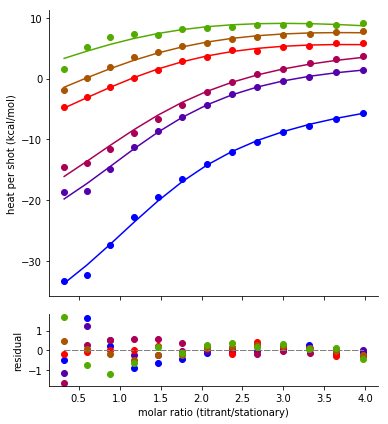

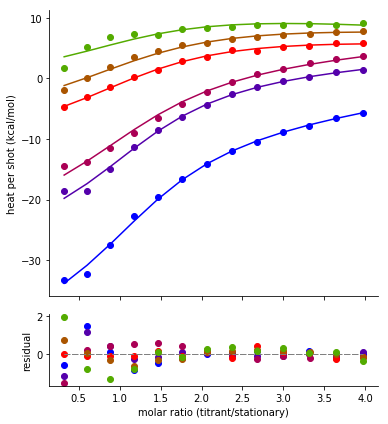

In [14]:
import pytc
from pytc import util

util.choose_model(g1,g2)
